Table of Contents
Step1. Warm-up 
Step2. Implement OCR code in Tensorflow Add new layer Drop out Step 3. Stochastic Gradient Descent 

## Step1

In [1]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


Analyze the response and explain what tf.Session() and tf.constant() commands do.???

## Step2. Implement OCR code in Tensorflow

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

W0825 12:53:46.504951  7860 deprecation.py:323] From <ipython-input-2-93d8da72a918>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0825 12:53:46.507950  7860 deprecation.py:323] From C:\Users\aks23\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0825 12:53:46.511948  7860 deprecation.py:323] From C:\Users\aks23\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz


W0825 12:53:49.025511  7860 deprecation.py:323] From C:\Users\aks23\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0825 12:53:49.036507  7860 deprecation.py:323] From C:\Users\aks23\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz


W0825 12:53:49.905009  7860 deprecation.py:323] From C:\Users\aks23\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [ ]:
#Q1- Explain this portion of the code.
#Q2- what is the usage of one_hot in read_data_sets() command.

In [3]:
# Functions that can define the size of train and test sets
def TRAIN_SIZE(num):
    print ('Total Training Images in Dataset = ' + str(mnist.train.images.shape))
    print ('--------------------------------------------------')
    x_train = mnist.train.images[:num,:]
    print ('x_train Examples Loaded = ' + str(x_train.shape))
    y_train = mnist.train.labels[:num,:]
    print ('y_train Examples Loaded = ' + str(y_train.shape))
    print('')
    return x_train, y_train

def TEST_SIZE(num):
    print ('Total Test Examples in Dataset = ' + str(mnist.test.images.shape))
    print ('--------------------------------------------------')
    x_test = mnist.test.images[:num,:]
    print ('x_test Examples Loaded = ' + str(x_test.shape))
    y_test = mnist.test.labels[:num,:]
    print ('y_test Examples Loaded = ' + str(y_test.shape))
    return x_test, y_test

In [4]:
import matplotlib.pyplot as plt
import random as ran
import numpy as np

In [7]:
def display_digit(num):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

In [8]:
def display_mult_flat(start, stop):
    images = x_train[start].reshape([1,784])
    for i in range(start+1,stop):
        images = np.concatenate((images, x_train[i].reshape([1,784])))
    plt.imshow(images, cmap=plt.get_cmap('gray_r'))
    plt.show()

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (55000, 784)
y_train Examples Loaded = (55000, 10)

Total Test Examples in Dataset = (10000, 784)
--------------------------------------------------
x_test Examples Loaded = (10000, 784)
y_test Examples Loaded = (10000, 10)
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


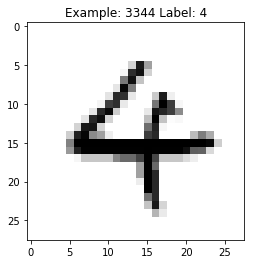

In [5]:
x_train, y_train = TRAIN_SIZE(55000)

x_test, y_test = TEST_SIZE(10000)

display_digit(ran.randint(0, x_train.shape[0]))

In [6]:
sess = tf.Session()

# Input and output
x = tf.placeholder(tf.float32, shape=[None, 784]) # input image 28*28 = 784
y_ = tf.placeholder(tf.float32, shape=[None, 10]) # 0-9 digits (10 classes)

# Model parameters
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))


y = tf.nn.softmax(tf.matmul(x,W) + b)

In [ ]:
#Q3- It appears that tf.placeholder() , tf.Variable() and tf.constant() all are for assigning variables so what is the difference between them?

In [9]:
init = tf.global_variables_initializer()
sess.run(init)

In [10]:
LEARNING_RATE = 0.1
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y),reduction_indices=[1]))
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
#Q.4) Write a few sentences about tf.train.GradientDescentOptimizer and tf.equal commands. What is the effect of tf.argmax()

In [11]:
TRAIN_STEPS = 250
for i in range(TRAIN_STEPS+1):
    sess.run(training, feed_dict={x: x_train, y_: y_train})
    if i%100 == 0:
        print('Training Step:' + str(i) + ' Accuracy = ' +
    str(sess.run(accuracy, feed_dict={x: x_test, y_: y_test})) + ' Loss = ' +
    str(sess.run(cross_entropy, {x: x_train, y_: y_train})))

Training Step:0 Accuracy = 0.6705 Loss = 2.1970634
Training Step:100 Accuracy = 0.8713 Loss = 0.6085837
Training Step:200 Accuracy = 0.8857 Loss = 0.49071


In [ ]:
Q5- Explain this part of the code.

In [12]:
# Input and output
X = tf.placeholder(tf.float32, shape=[None, 784]) # input image 28*28 = 784
Y_ = tf.placeholder(tf.float32, shape=[None, 10]) #0-9 digits (10 classes)

In [13]:
# Two hidden layers, output layer and their number of neurons (the last layer has 10 softmax neurons)
L = 100
M = 30

In [14]:
# tf.truncated_normal is a TensorFlow function that produces random values following the normal (Gaussian) distribution between -2*stddev and +2*stddev
W1 = tf.Variable(tf.truncated_normal([784, L], stddev=0.1)) # 784 = 28 * 28
B1 = tf.Variable(tf.zeros([L]))
W2 = tf.Variable(tf.truncated_normal([L, M], stddev=0.1))
B2 = tf.Variable(tf.zeros([M]))
W3 = tf.Variable(tf.truncated_normal([M, 10], stddev=0.1))
B3 = tf.Variable(tf.zeros([10]))

In [15]:
# The model
XX = tf.reshape(X, [-1, 784])
Y1 = tf.nn.sigmoid(tf.matmul(XX, W1) + B1)
Y2 = tf.nn.sigmoid(tf.matmul(Y1, W2) + B2)
Ylogits = tf.matmul(Y2, W3) + B3
Y = tf.nn.softmax(Ylogits)

In [16]:
# cross-entropy loss function (= -sum(Y_i * log(Yi)) ), normalised for batches of 100 images
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits,labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

W0825 13:05:41.907672  7860 deprecation.py:323] From <ipython-input-16-16e072c4eb32>:4: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [17]:
# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [18]:
# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [19]:
#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y),reduction_indices=[1]))
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
#correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
#accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
TRAIN_STEPS = 1000
for i in range(TRAIN_STEPS+1):
    sess.run(training, feed_dict={X: x_train, Y_: y_train})
    if i%100 == 0:
        print('Training Step:' + str(i) + ' Accuracy = ' +
    str(sess.run(accuracy, feed_dict={X: x_test, Y_: y_test})) + ' Loss = ' +
    str(sess.run(cross_entropy, {X: x_train, Y_: y_train})))

Training Step:0 Accuracy = 0.101 Loss = 375.5443
Training Step:100 Accuracy = 0.4983 Loss = 162.48523
Training Step:200 Accuracy = 0.9259 Loss = 26.892141
Training Step:300 Accuracy = 0.9269 Loss = 27.17197
Training Step:400 Accuracy = 0.952 Loss = 14.366916
Training Step:500 Accuracy = 0.9604 Loss = 10.672213
Training Step:600 Accuracy = 0.9499 Loss = 16.726273
Training Step:700 Accuracy = 0.9624 Loss = 9.389396
Training Step:800 Accuracy = 0.9649 Loss = 7.374257
Training Step:900 Accuracy = 0.966 Loss = 6.0084867
Training Step:1000 Accuracy = 0.943 Loss = 20.963127


Drop out
Tensorflow can make dropout algorithm. By default it can keep 75% of the nodes during the
trainin

In [20]:
# Input and output
X = tf.placeholder(tf.float32, shape=[None, 784]) # input image 28*28 = 784
Y_ = tf.placeholder(tf.float32, shape=[None, 10]) #0-9 digits (10 classes)
pkeep = tf.placeholder(tf.float32)
L = 100
M = 30
N = 60
O = 30
# tf.truncated_normal is a TensorFlow function that produces random values following the normal (Gaussian) distribution between -2*stddev and +2*stddev
W1 = tf.Variable(tf.truncated_normal([784, L], stddev=0.1)) # 784 = 28 * 28
B1 = tf.Variable(tf.ones([L])/10)
W2 = tf.Variable(tf.truncated_normal([L, M], stddev=0.1))
B2 = tf.Variable(tf.ones([M])/10)
W3 = tf.Variable(tf.truncated_normal([M, 10], stddev=0.1))
B3 = tf.Variable(tf.zeros([10]))
# The model
XX = tf.reshape(X, [-1, 784])
Y1 = tf.nn.relu(tf.matmul(XX, W1) + B1)
Y1d = tf.nn.dropout(Y1, pkeep)
Y2 = tf.nn.relu(tf.matmul(Y1, W2) + B2)
Y2d = tf.nn.dropout(Y2, pkeep)
Ylogits = tf.matmul(Y2d, W3) + B3
Y = tf.nn.softmax(Ylogits)

W0825 13:18:33.568734  7860 deprecation.py:506] From <ipython-input-20-e0105bfe7cc1>:19: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
# cross-entropy loss function (= -sum(Y_i * log(Yi)) ), normalised for batches of 100 images
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100


# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
LEARNING_RATE = 0.01

#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y),reduction_indices=[1]))
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

#correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
#accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

TRAIN_STEPS = 1000
for i in range(TRAIN_STEPS+1):
    sess.run(training, feed_dict={X: x_train, Y_: y_train, pkeep: 0.75 })
    if i%100 == 0:
        print('Training Step:' + str(i) + ' Accuracy = ' +
    str(sess.run(accuracy, feed_dict={X: x_test, Y_: y_test, pkeep: 1.0})) + 
    'Loss = ' + str(sess.run(cross_entropy, {X: x_train, Y_: y_train , pkeep: 0.75})))

Training Step:0 Accuracy = 0.1726Loss = 224.33026
Training Step:100 Accuracy = 0.908Loss = 40.207478
Training Step:200 Accuracy = 0.9481Loss = 22.996412
Training Step:300 Accuracy = 0.9595Loss = 17.545042
Training Step:400 Accuracy = 0.9623Loss = 14.517075
Training Step:500 Accuracy = 0.9662Loss = 12.436522
Training Step:600 Accuracy = 0.9668Loss = 10.724318
Training Step:700 Accuracy = 0.9684Loss = 9.661769
Training Step:800 Accuracy = 0.9708Loss = 8.318644
Training Step:900 Accuracy = 0.9725Loss = 7.4137015
Training Step:1000 Accuracy = 0.9727Loss = 6.877028


## Step 3. Stochastic Gradient Descent